# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pd.pandas.set_option("display.max_columns",None) 

# Exploratory Data Analysis

In [3]:
dataset=pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.shape

(1460, 81)

In [5]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# dropping 'id' feature as it is sequantial unique number
dataset.drop(['Id'],inplace=True,axis=1)

In [7]:
# splitting categorical and numerical
categorical_features=[]
numerical_features=[]
for feature in dataset.columns:
    if feature != 'SalePrice':
        if dataset[feature].dtype=='O':
            categorical_features.append(feature)
        else:
            numerical_features.append(feature)

In [8]:
# extract year feature
year_features=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

In [9]:
# splitting discrete and continuous features
discrete_features=[]
continuous_features=[]
for feature in numerical_features:
    if feature not in year_features:
        if ((len(dataset[feature].unique())) < 50):
            discrete_features.append(feature)
        else:
            continuous_features.append(feature)

In [10]:
# Missing value features
missing_values= [feature for feature in dataset.columns if (dataset[feature].isnull().sum() > 0) and feature !='SalePrice']

## Univariate Analysis

### Numerical variables

#### Continuous features

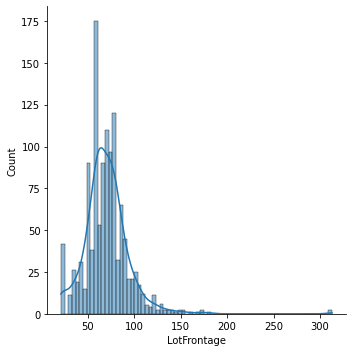

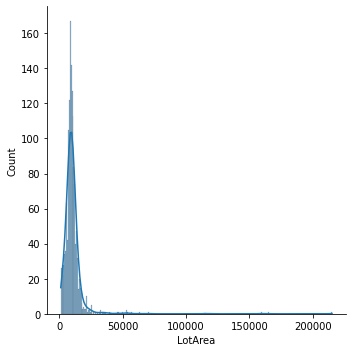

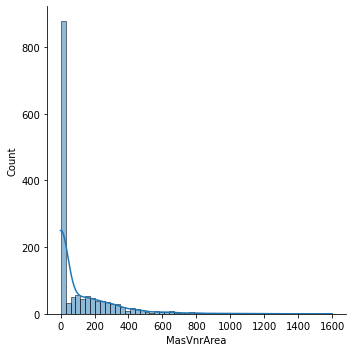

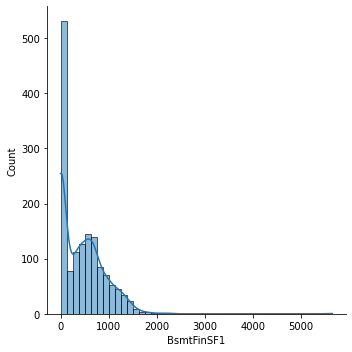

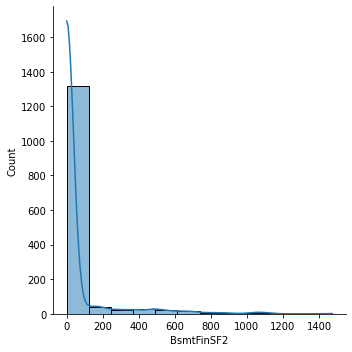

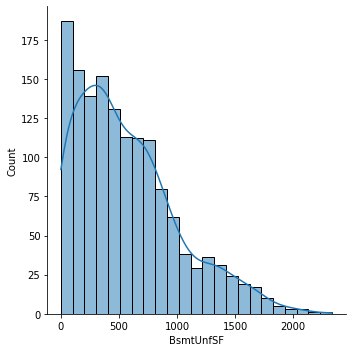

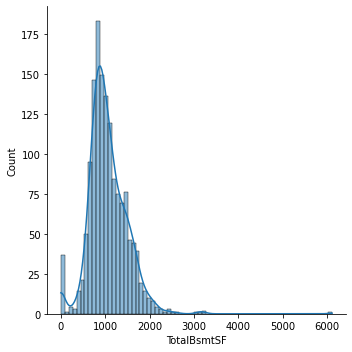

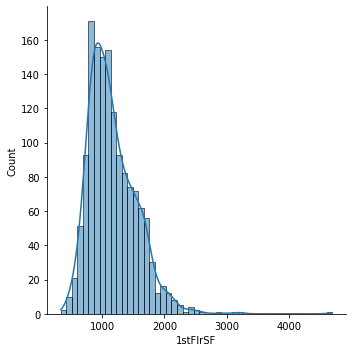

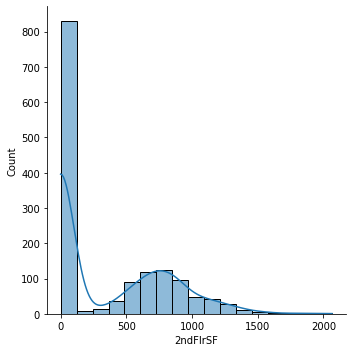

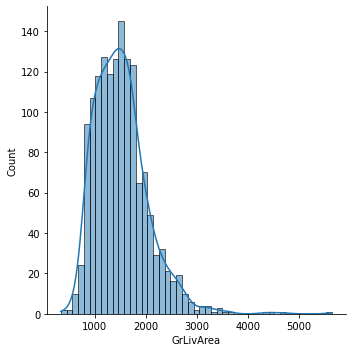

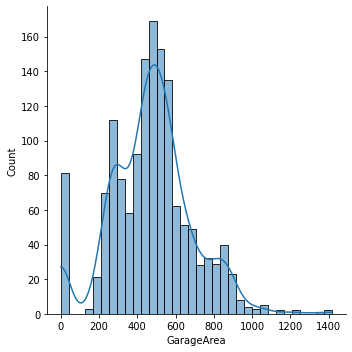

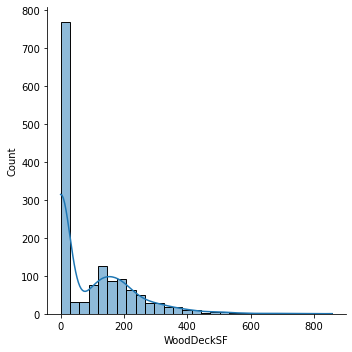

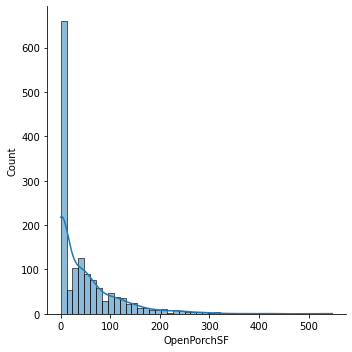

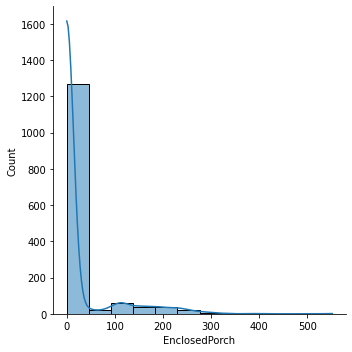

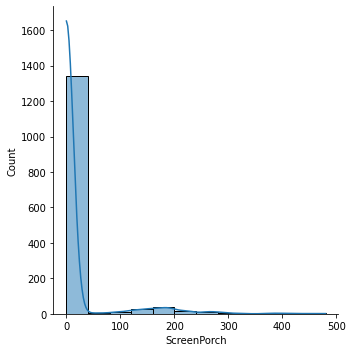

In [11]:
sns.reset_orig()
for feature in continuous_features:
    sns.displot(dataset[feature],kde=True,palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))

#### distribution after log transformation

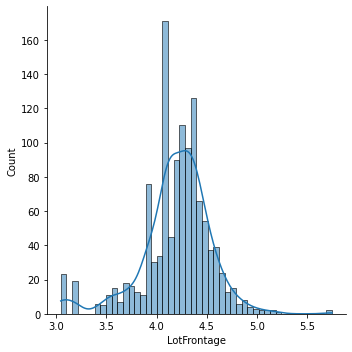

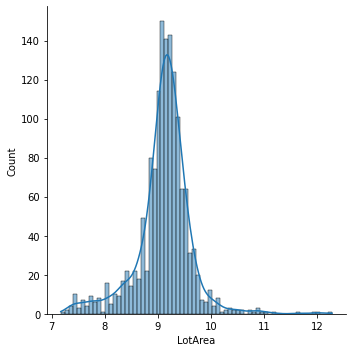

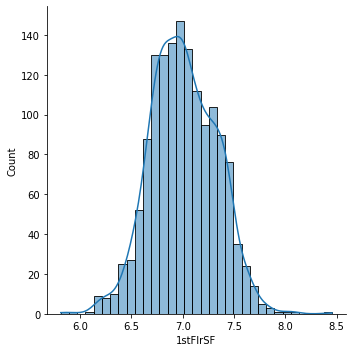

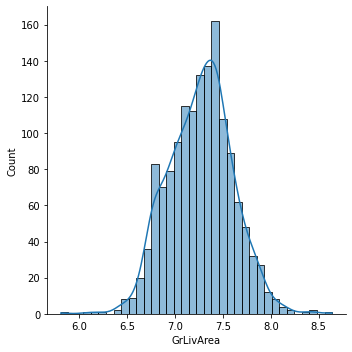

In [12]:
sns.reset_orig()
data=dataset.copy()
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        sns.displot(data[feature],kde=True,palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
        plt.show()

#### Discrete features

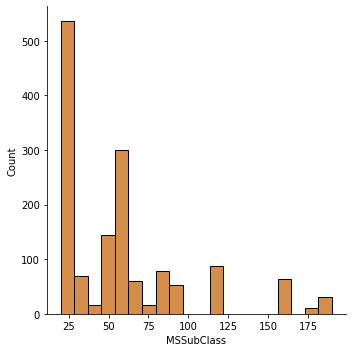

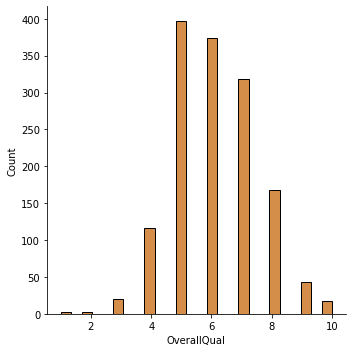

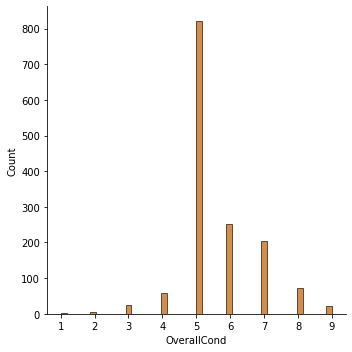

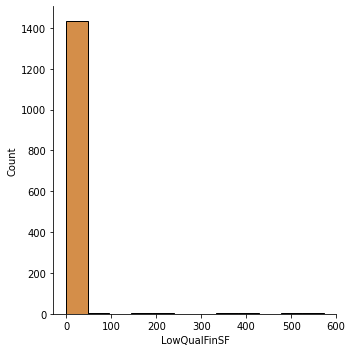

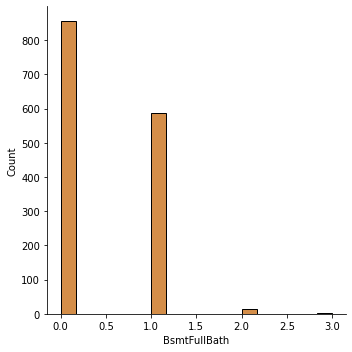

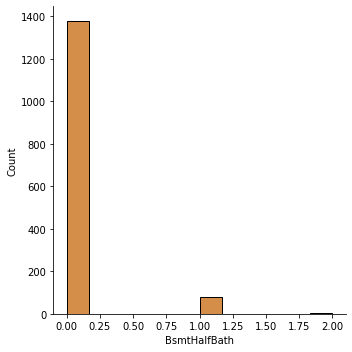

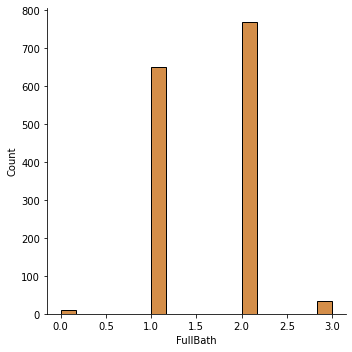

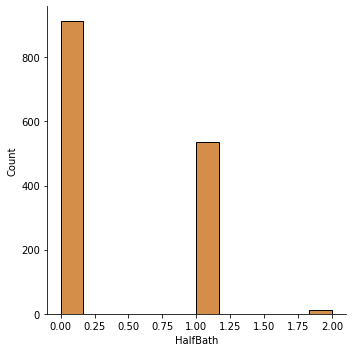

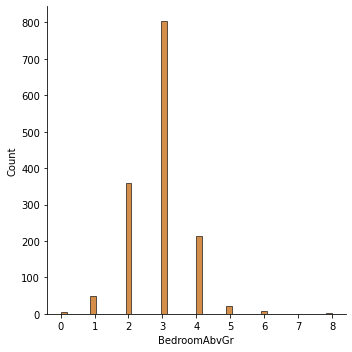

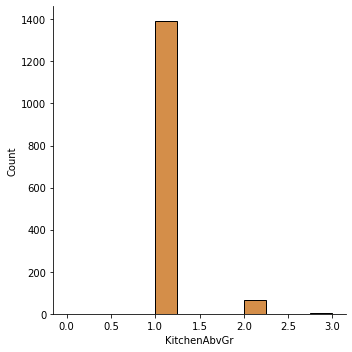

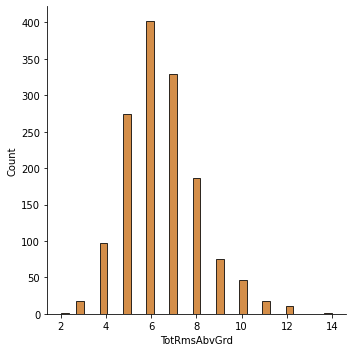

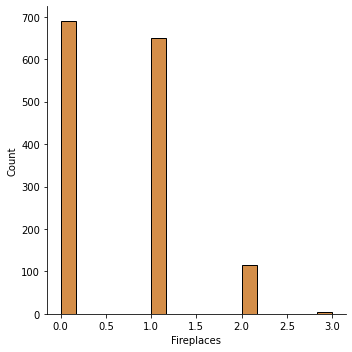

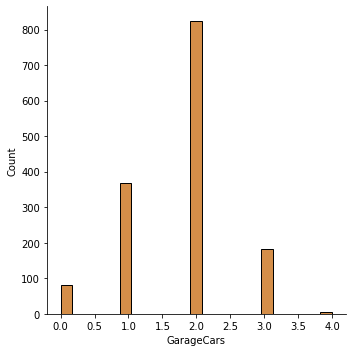

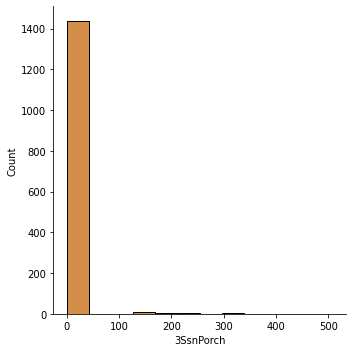

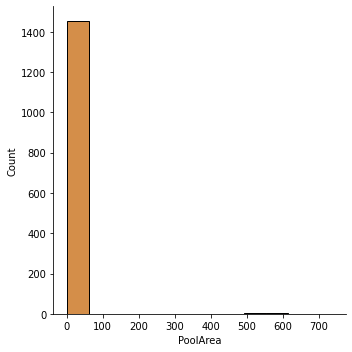

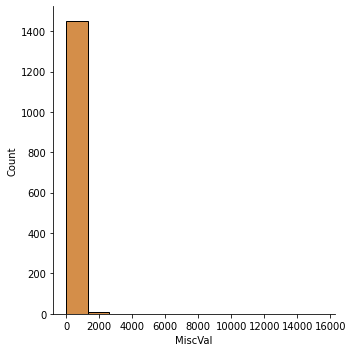

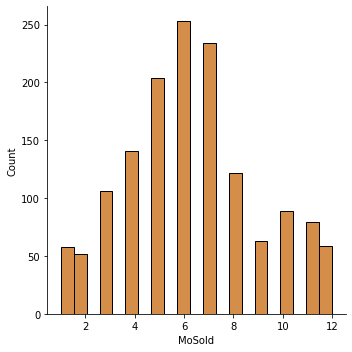

In [13]:
for feature in discrete_features:
    sns.displot(dataset[feature],palette=sns.set_palette("PuOr"))

#### categorical features

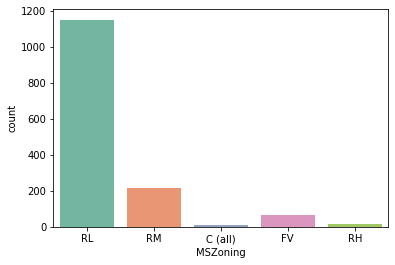

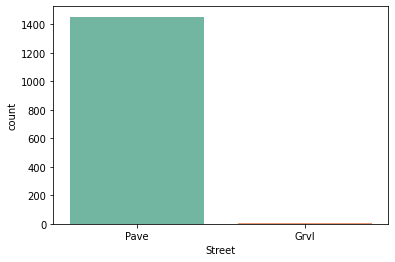

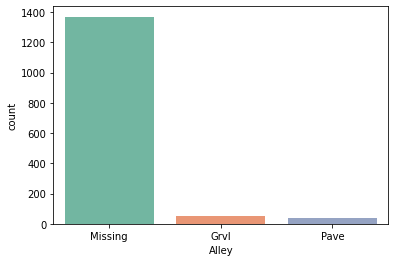

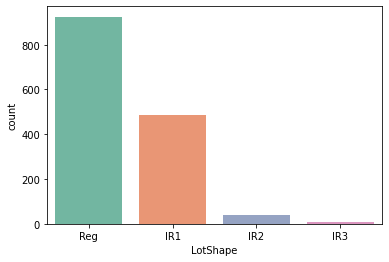

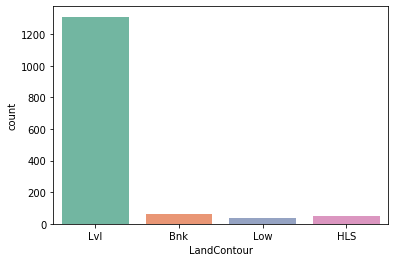

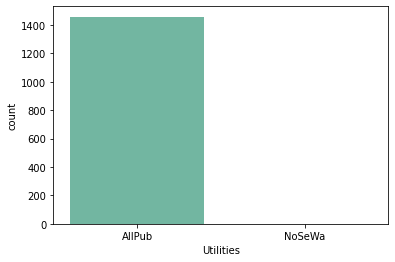

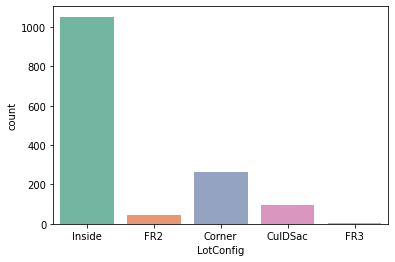

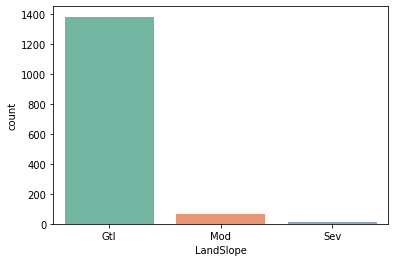

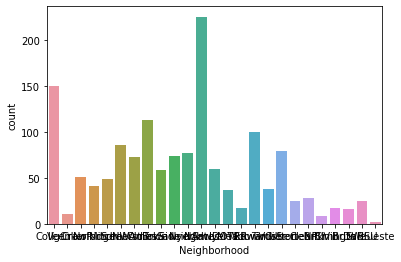

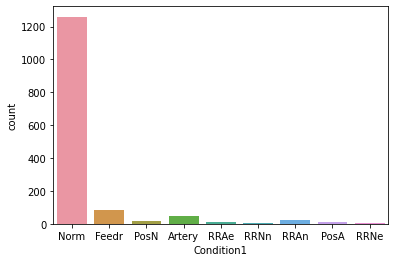

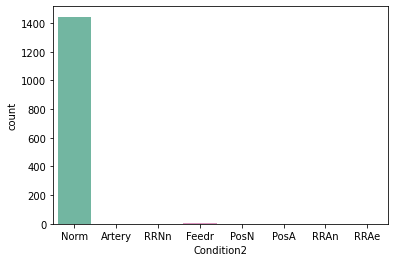

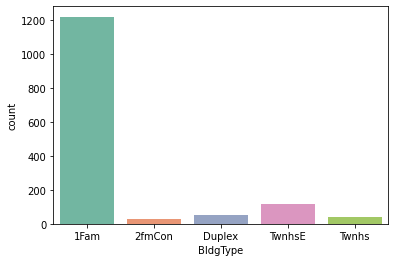

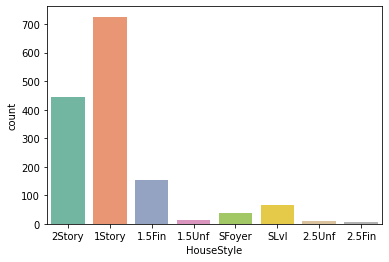

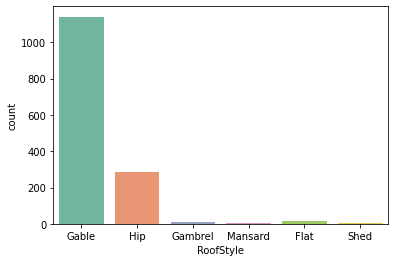

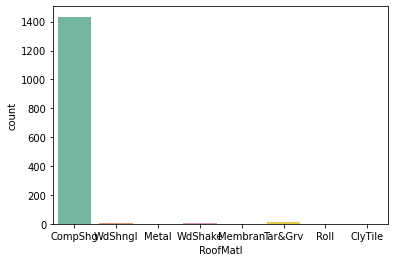

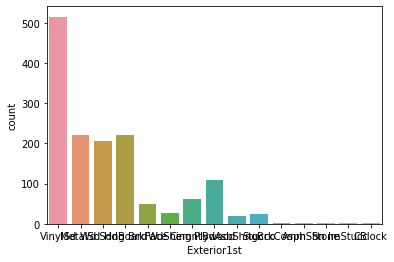

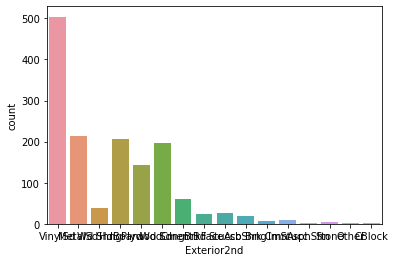

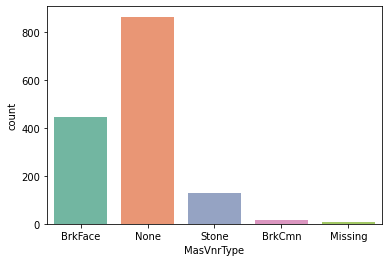

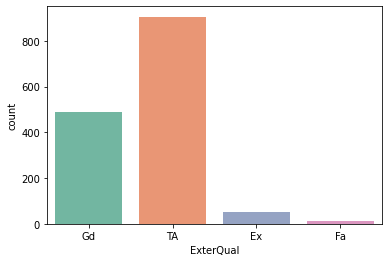

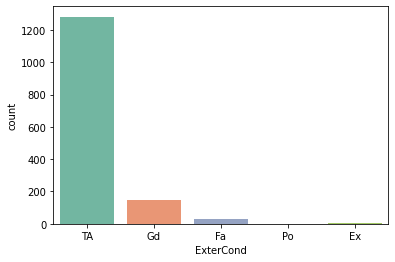

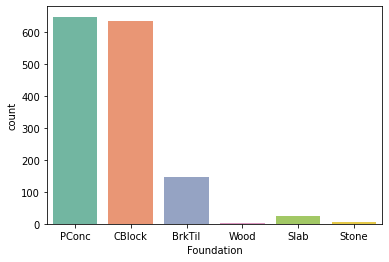

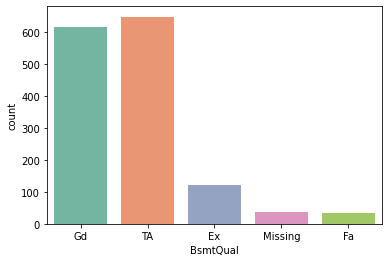

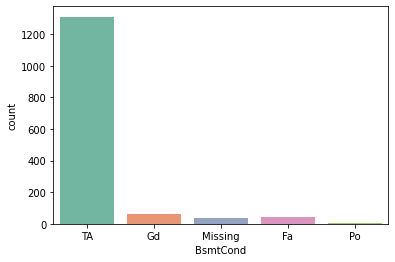

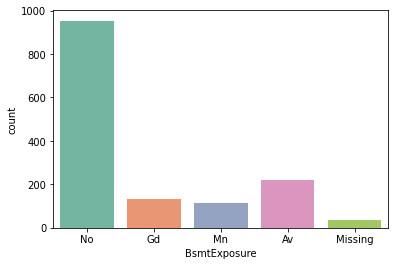

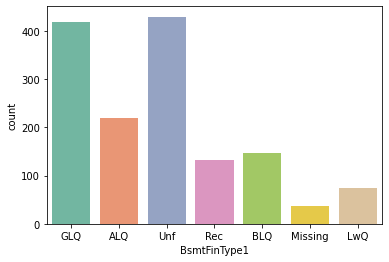

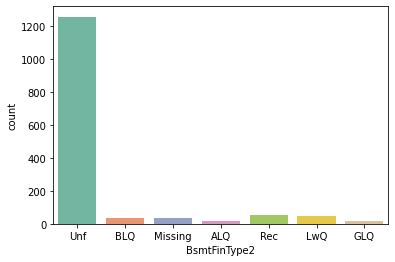

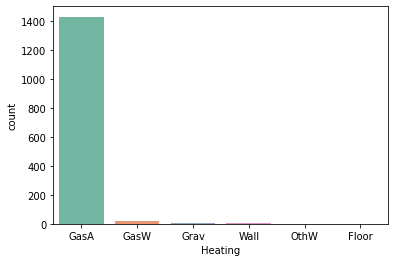

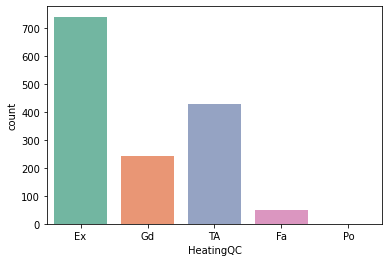

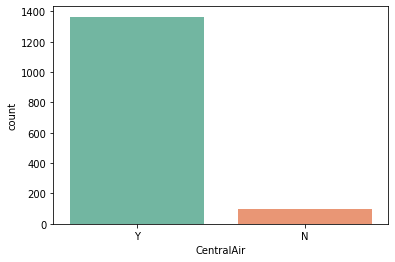

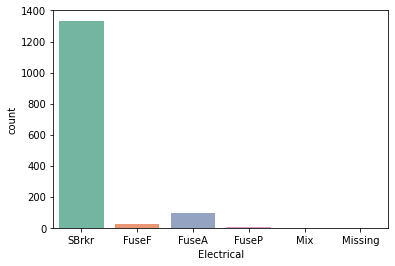

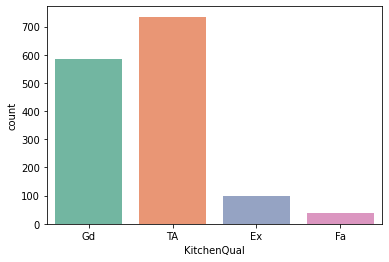

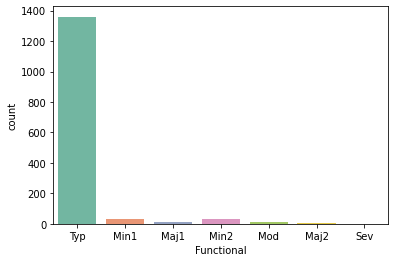

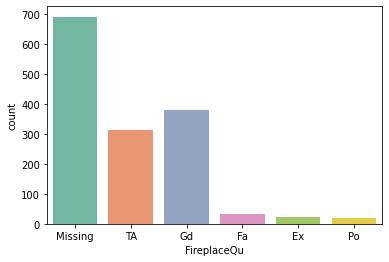

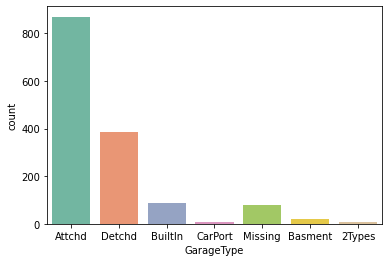

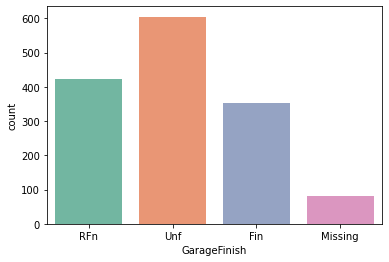

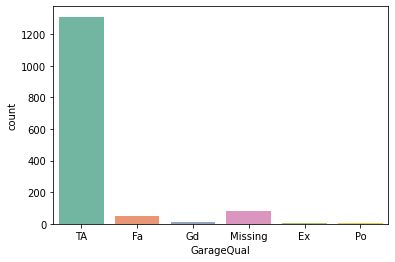

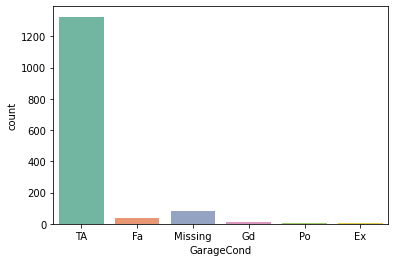

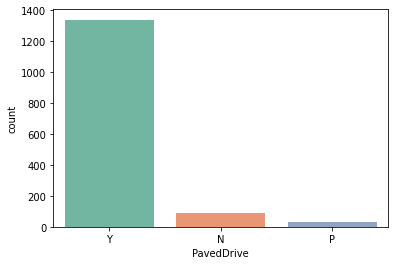

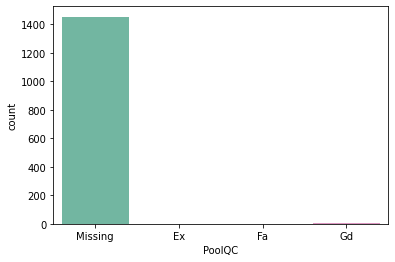

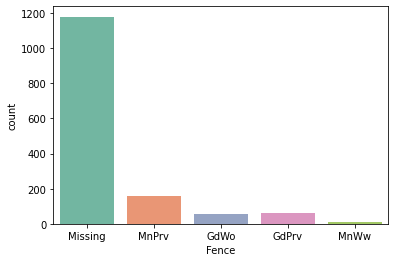

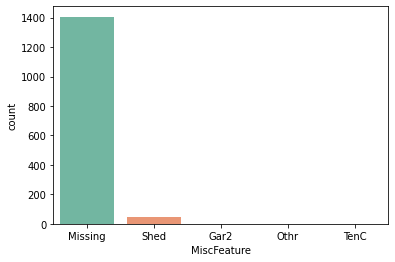

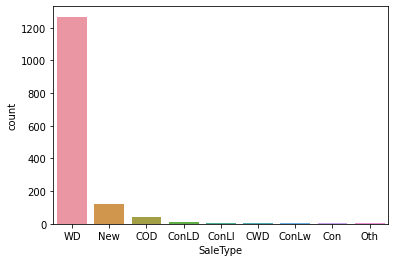

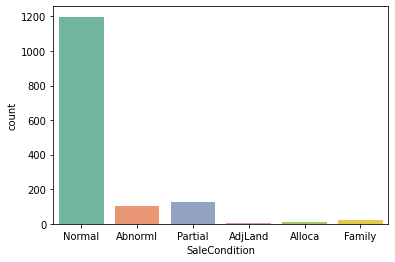

In [14]:
data=dataset.copy()
for feature in categorical_features:
    data[feature]=data[feature].fillna('Missing')
    sns.countplot(x=feature,data=data,palette=sns.set_palette("Set2"))
    plt.show()

## Outlier detection

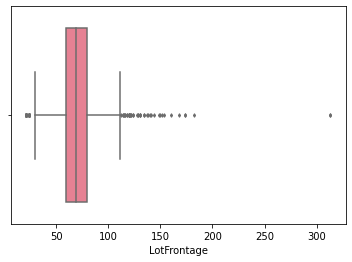

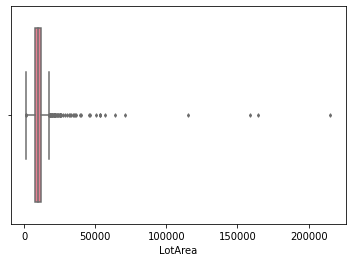

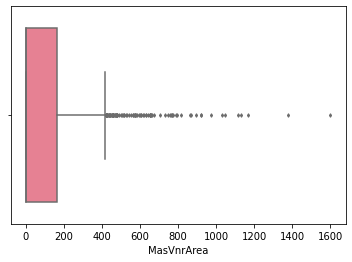

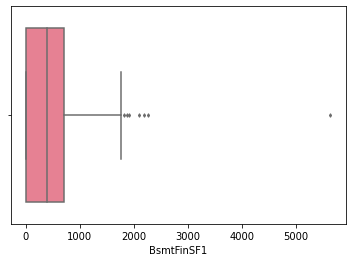

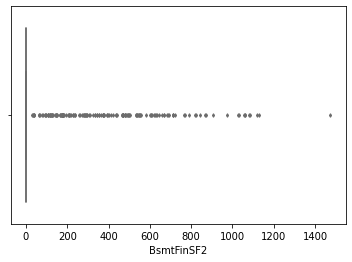

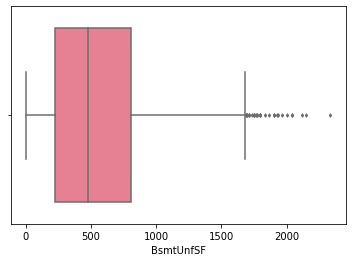

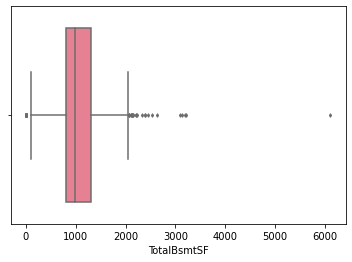

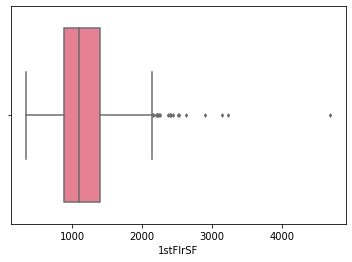

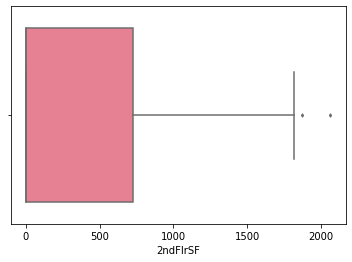

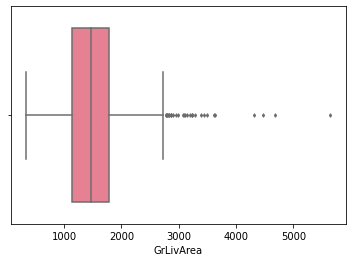

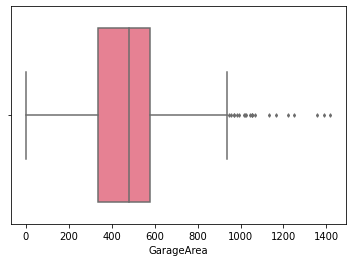

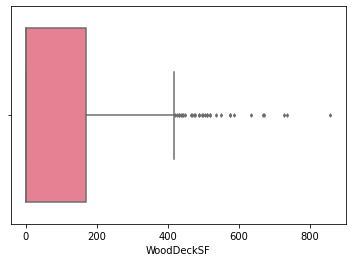

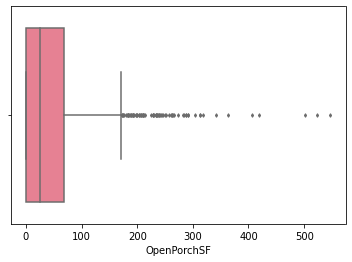

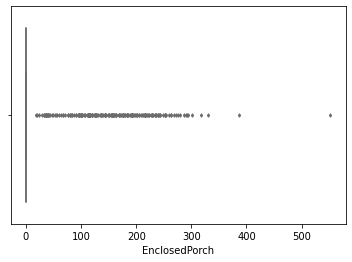

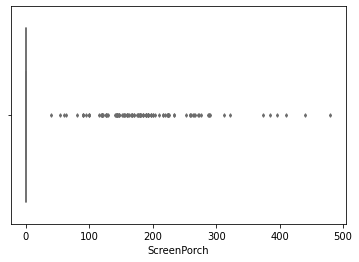

In [15]:
for feature in continuous_features:
    sns.boxplot(x=feature,data=dataset,palette=sns.color_palette("husl", 9),fliersize=2.5)
    plt.show()

## Bivariate Analysis

### Relationship between missing value and target feature

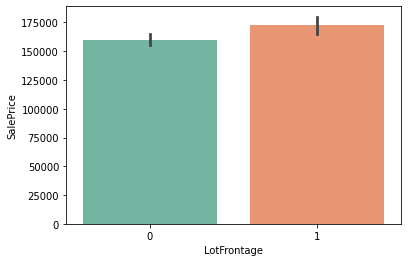

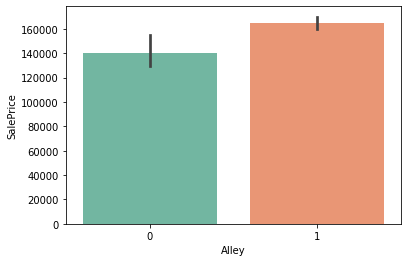

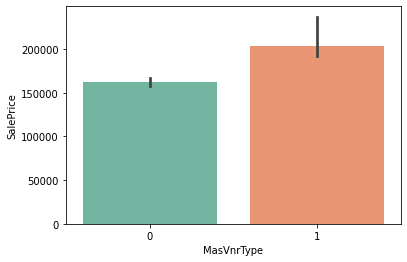

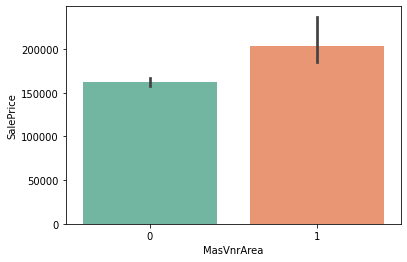

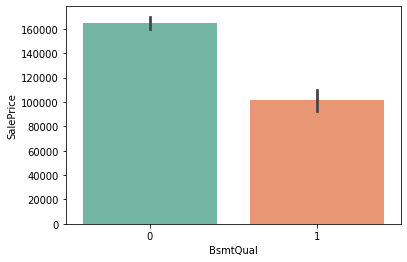

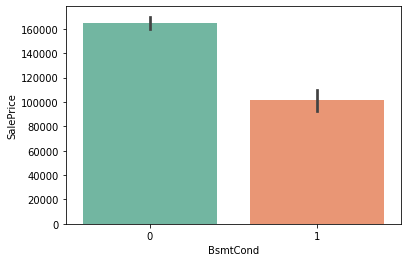

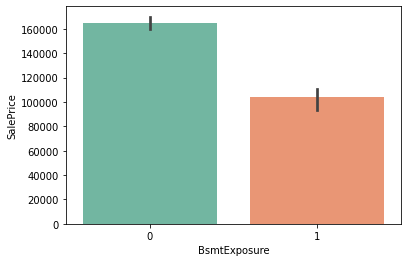

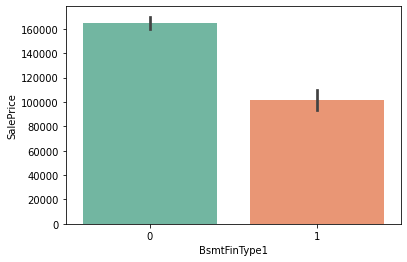

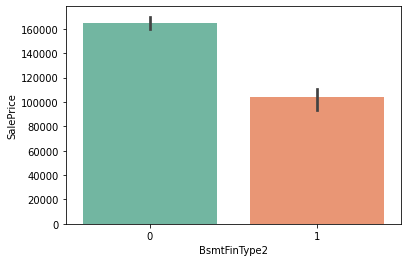

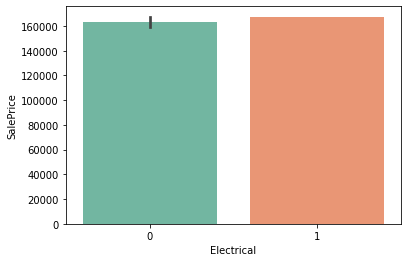

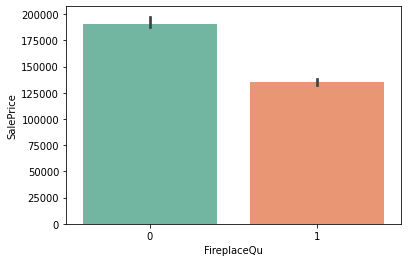

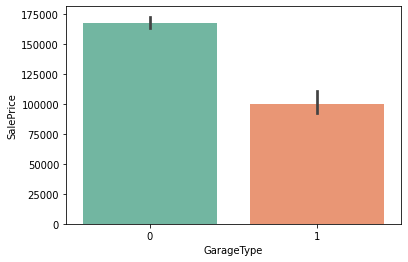

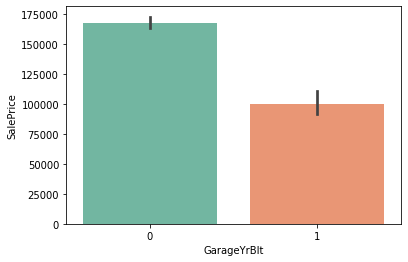

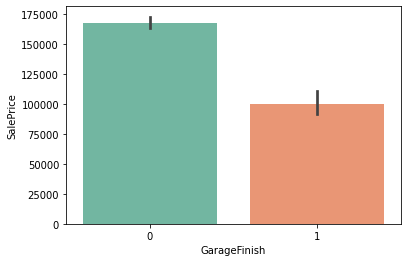

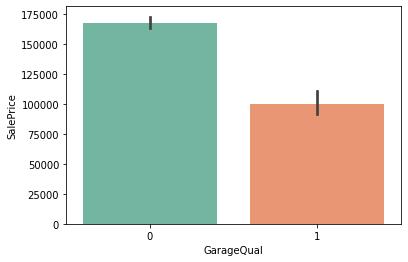

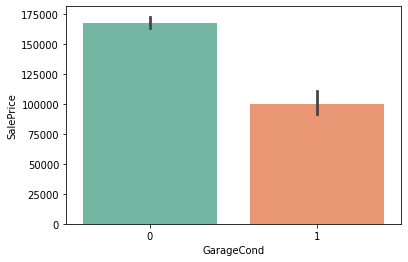

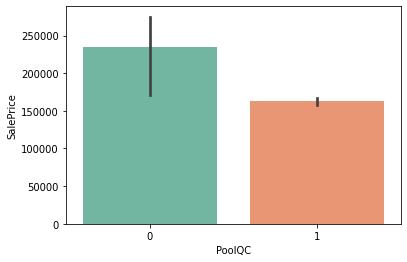

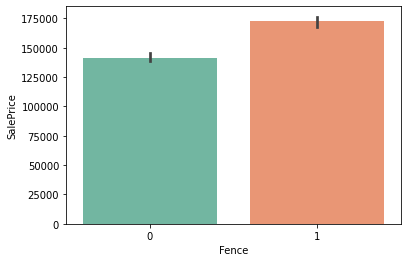

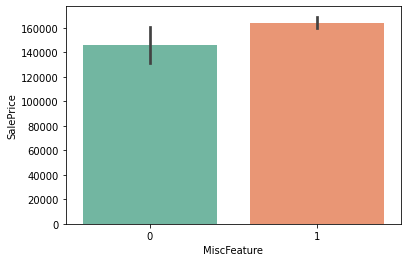

In [16]:
for feature in missing_values:
    data=dataset.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    sns.barplot(x=feature,y='SalePrice',data=data,estimator=np.median)
    plt.show()

### Relationship between numerical features and target

#### Continuous features

In [17]:
sns.reset_orig()

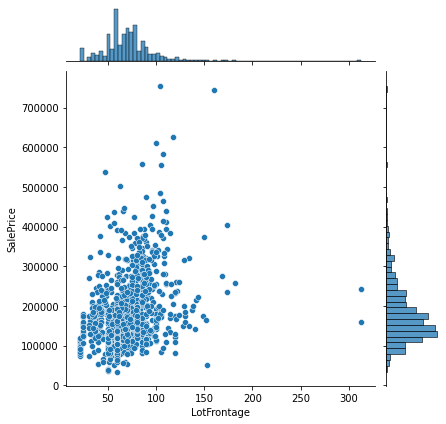

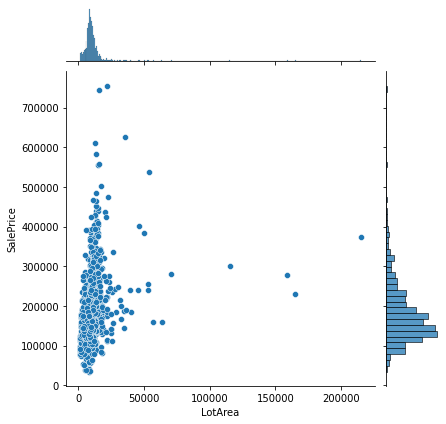

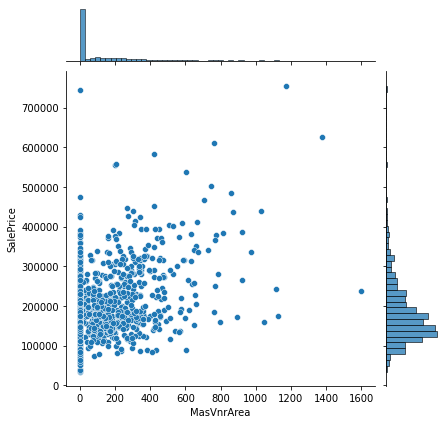

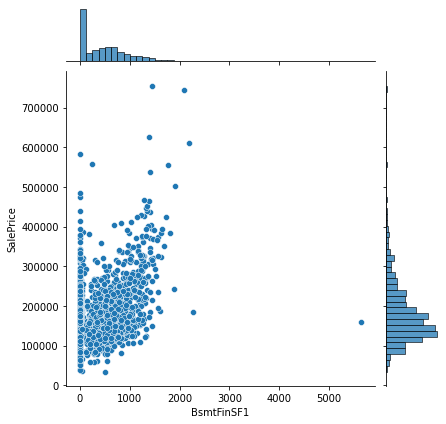

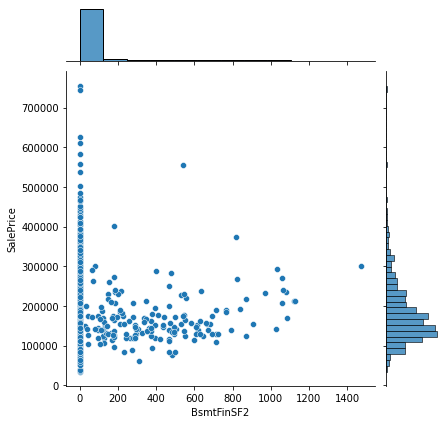

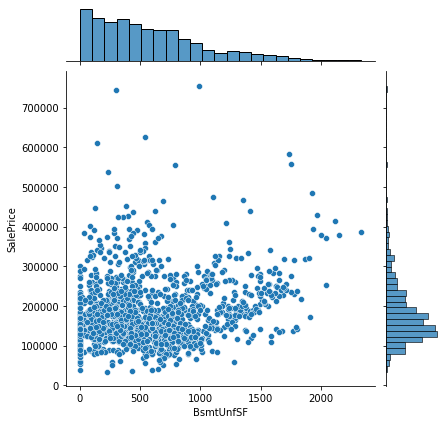

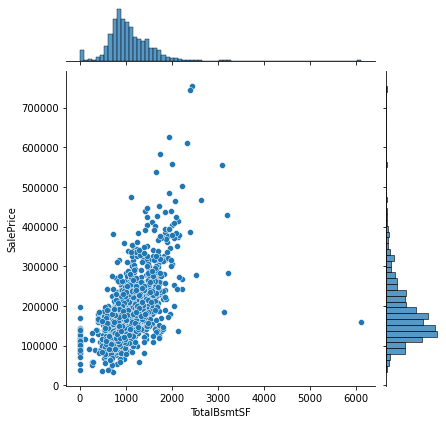

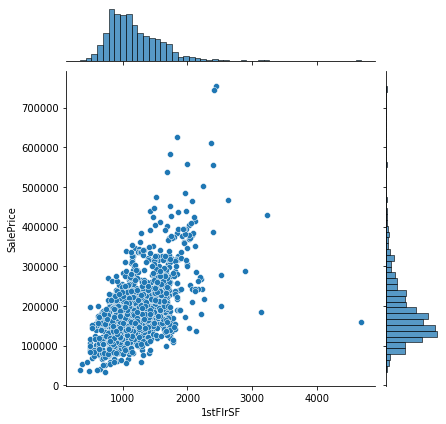

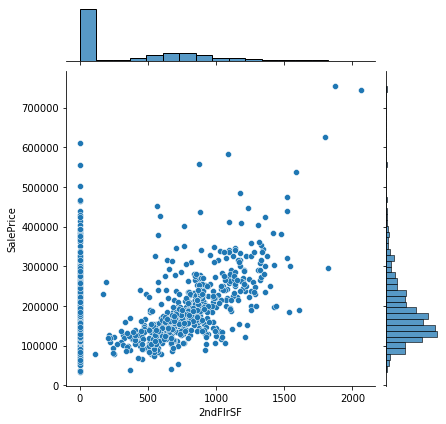

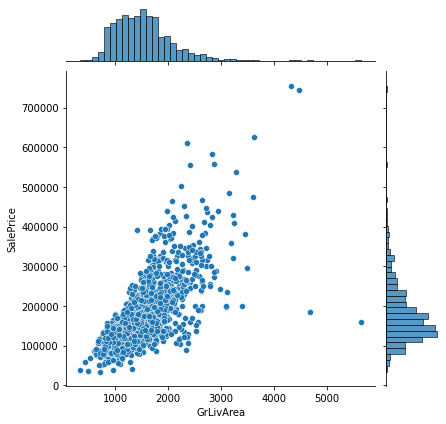

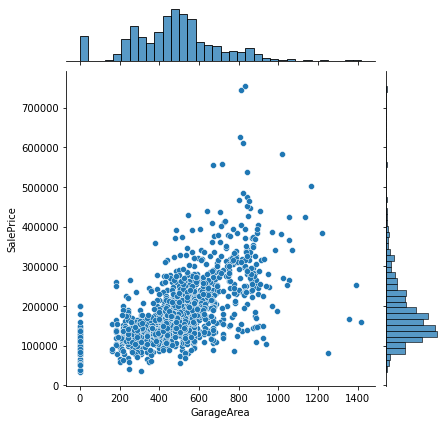

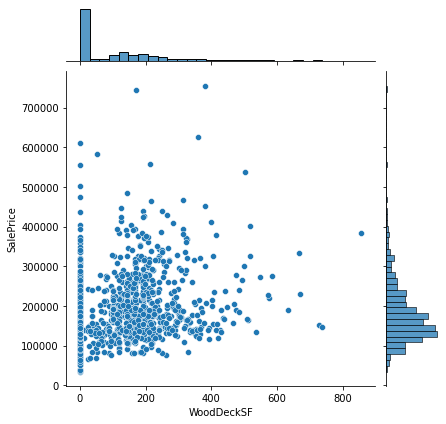

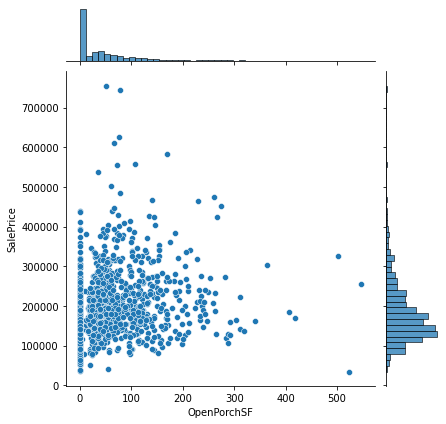

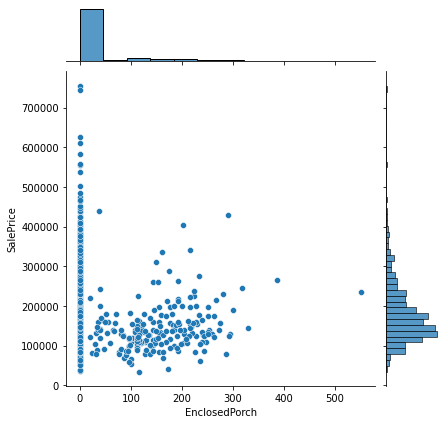

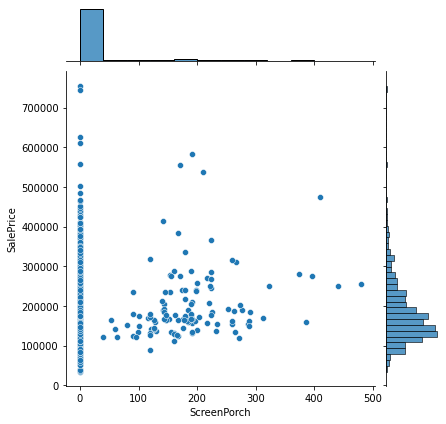

In [18]:
for feature in continuous_features:
    sns.jointplot(x=feature,y='SalePrice',data=dataset)

#### Discrete features

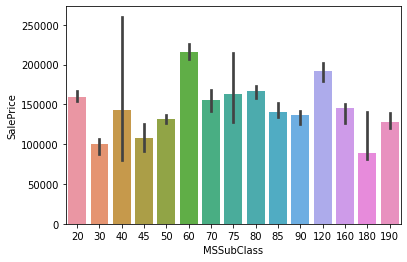

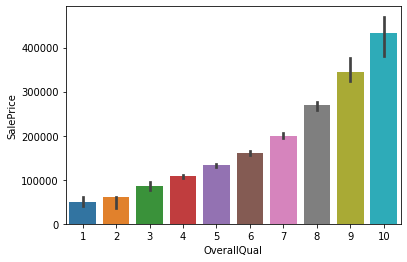

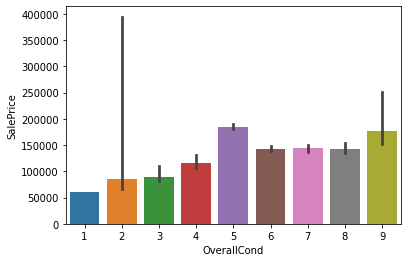

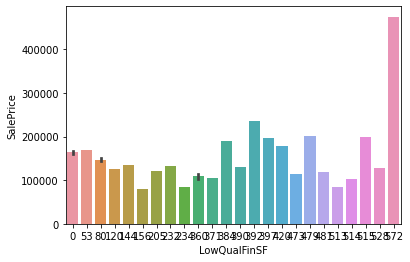

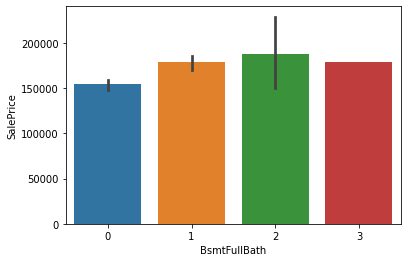

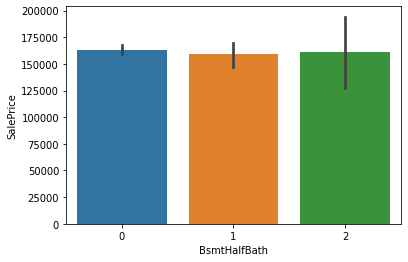

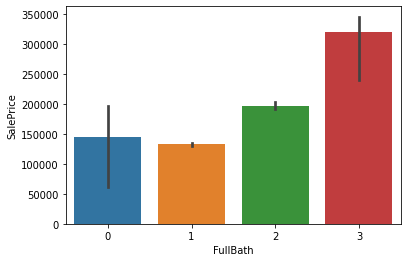

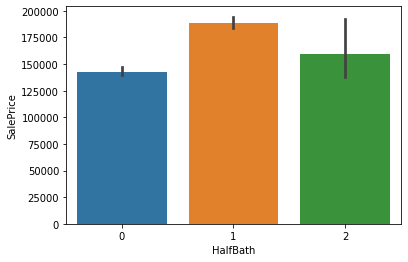

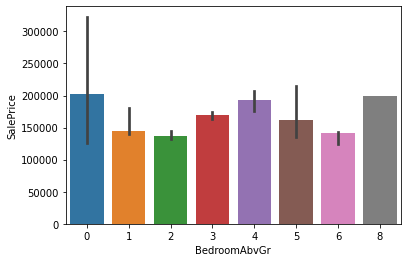

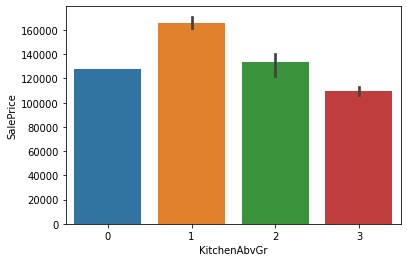

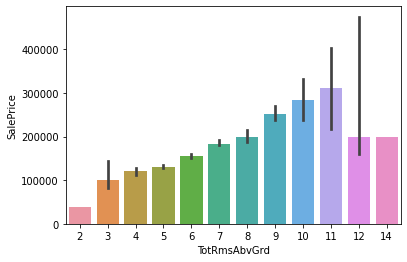

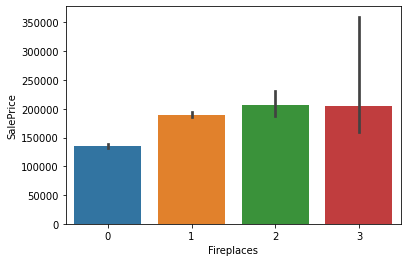

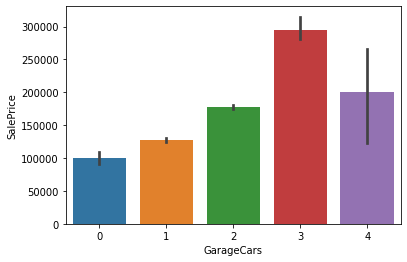

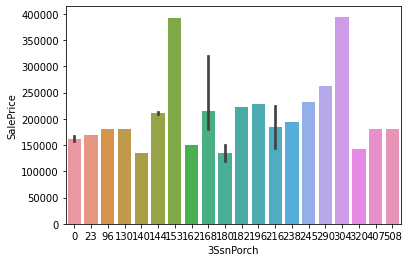

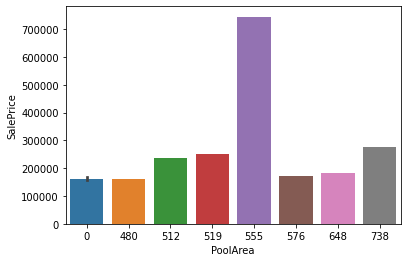

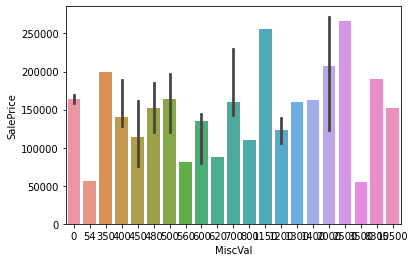

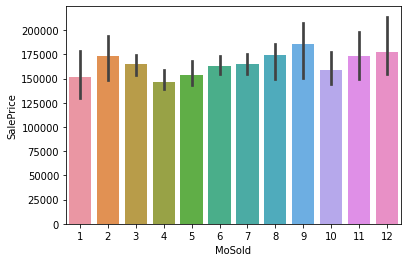

In [19]:
sns.color_palette("crest", as_cmap=True)
for feature in discrete_features:
    sns.barplot(x=feature,y='SalePrice',data=dataset,estimator=np.median)
    plt.show()

### Relationship between categorical features and target

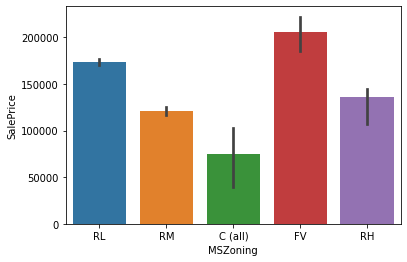

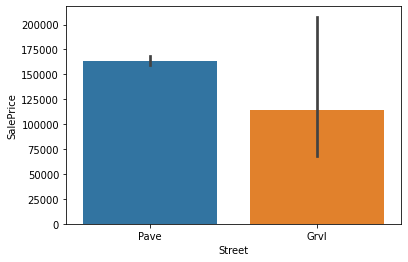

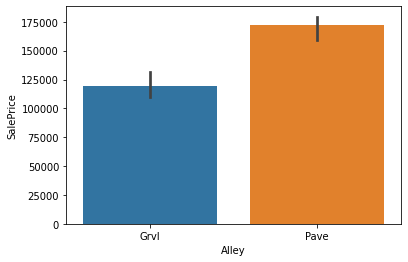

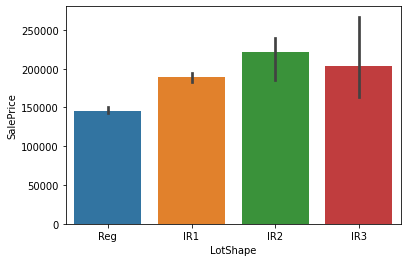

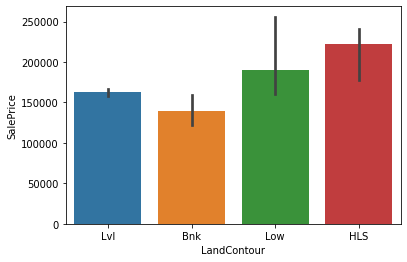

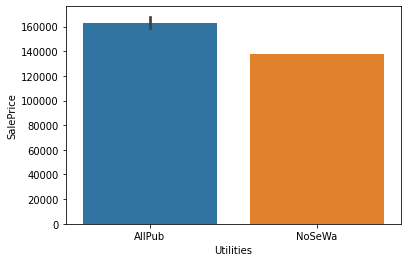

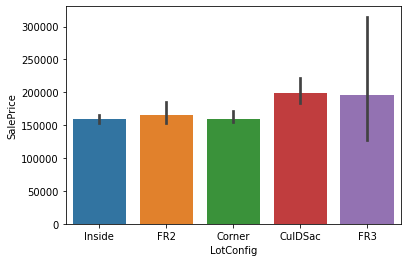

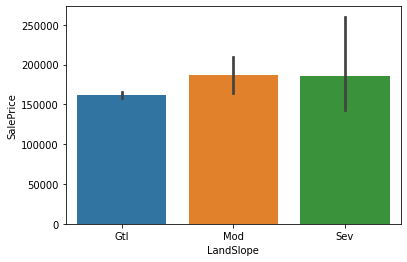

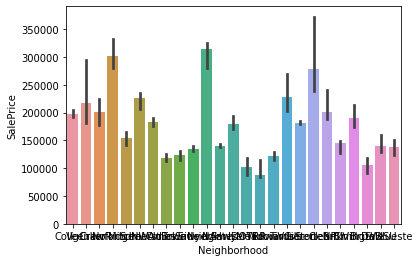

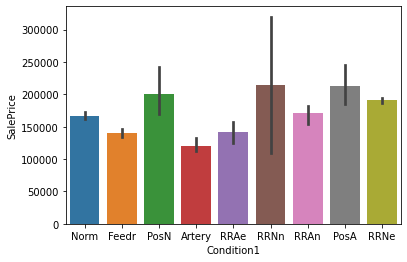

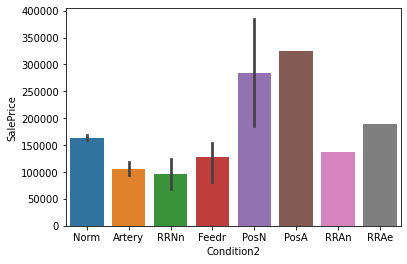

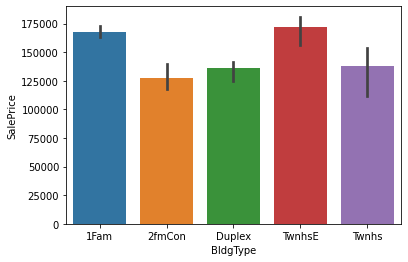

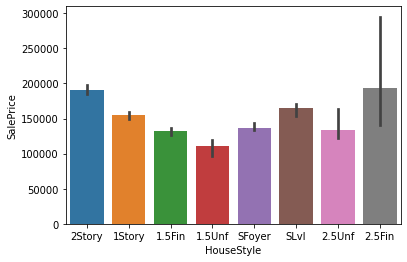

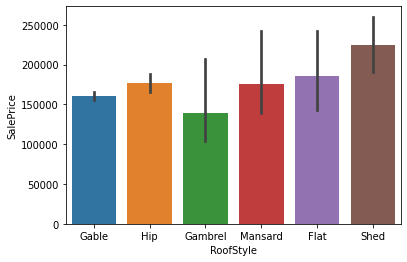

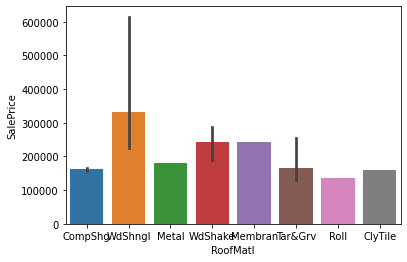

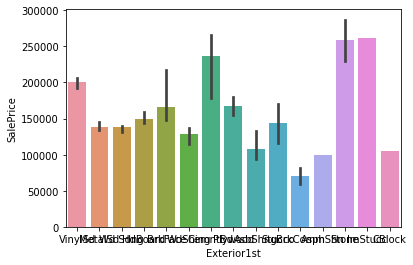

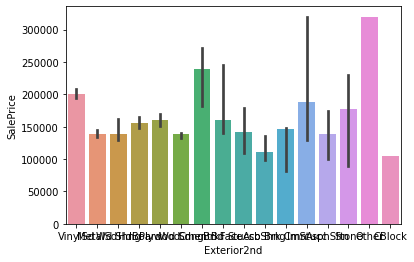

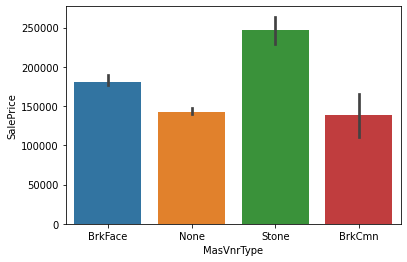

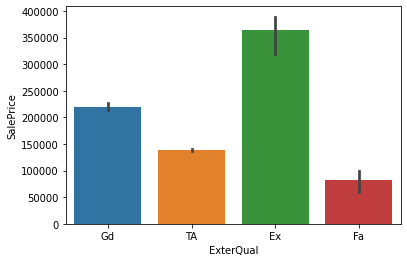

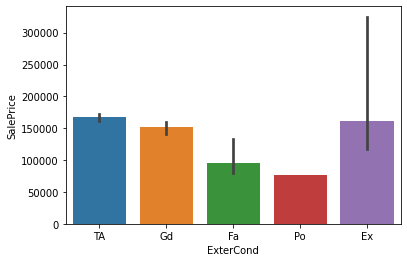

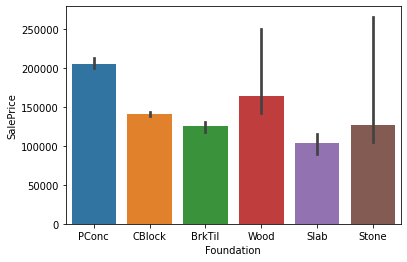

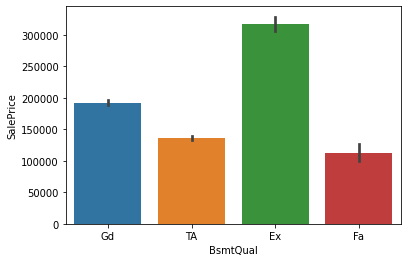

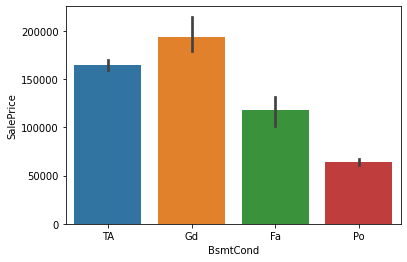

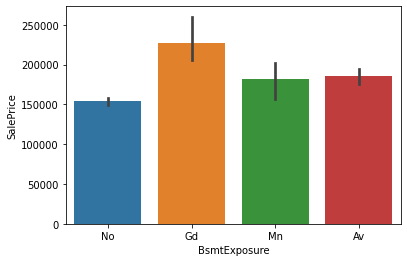

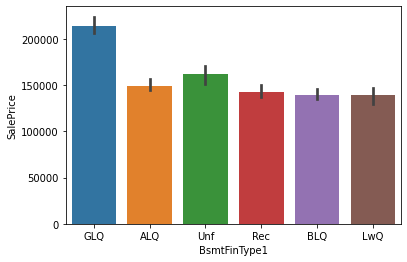

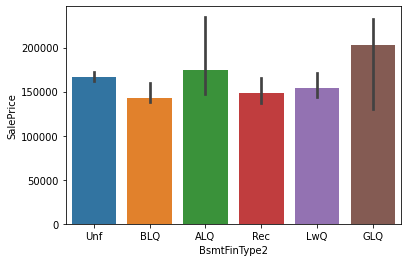

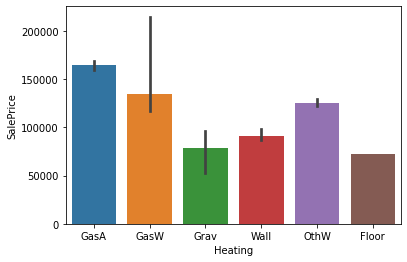

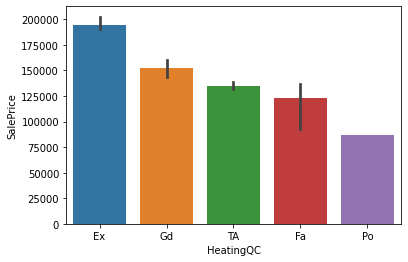

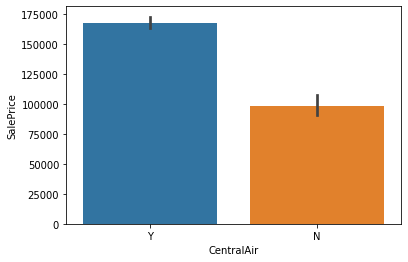

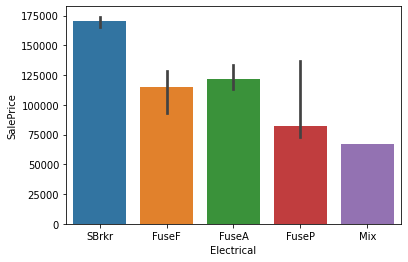

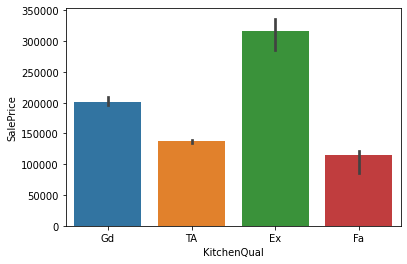

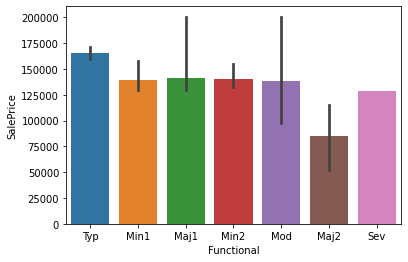

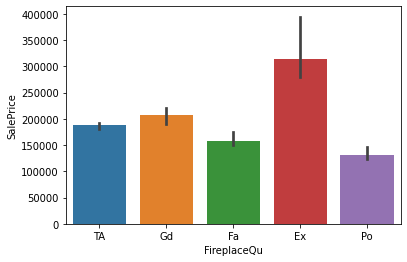

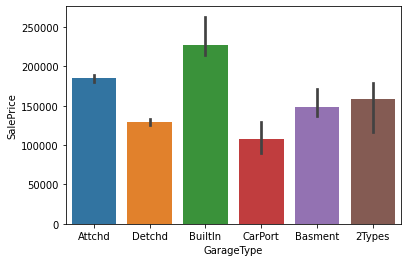

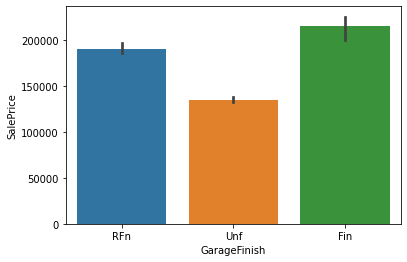

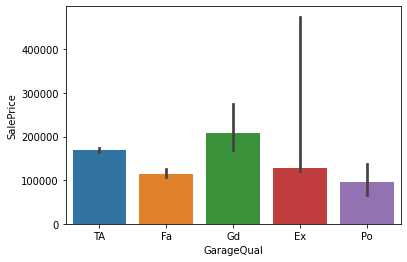

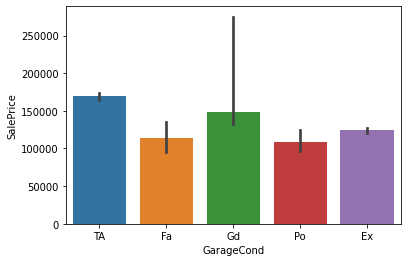

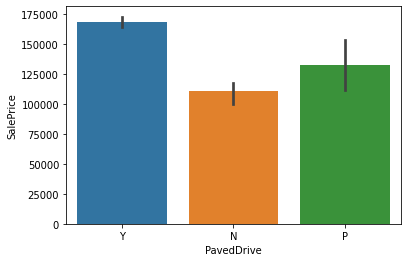

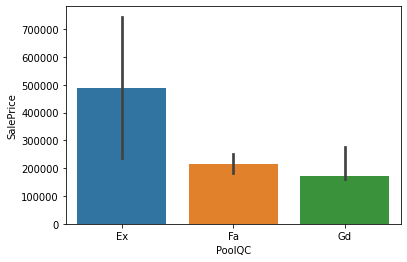

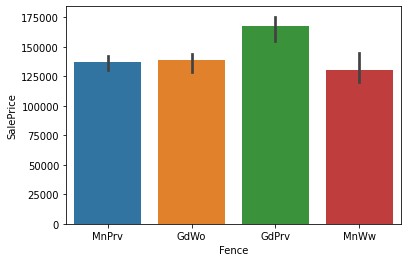

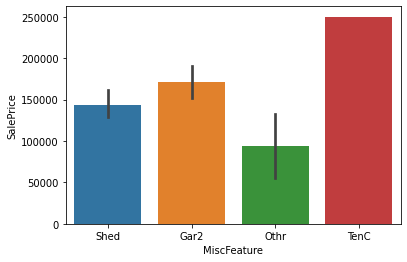

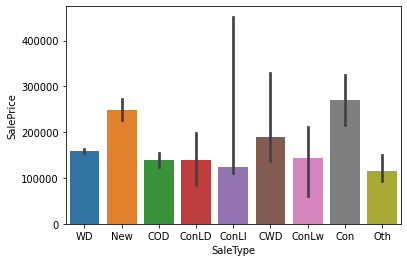

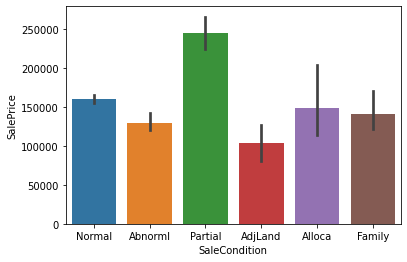

In [20]:
for feature in categorical_features:
    sns.barplot(x=feature,y='SalePrice',data=dataset,estimator=np.median)
    plt.show()

### Relationship between year feature and target

In [21]:
data[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


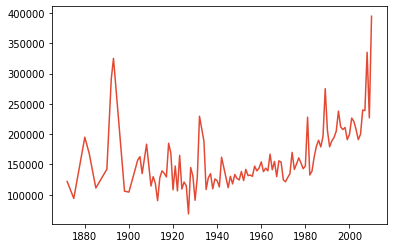

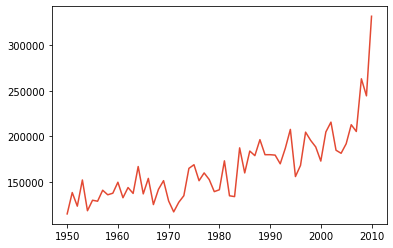

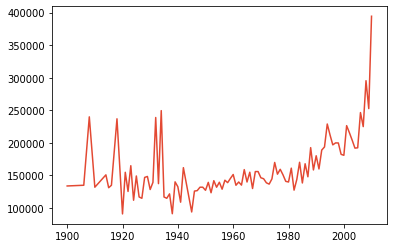

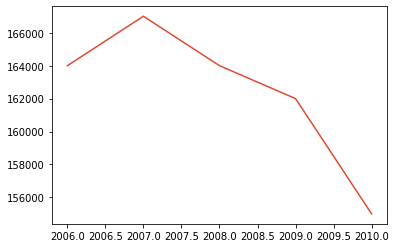

In [22]:
sns.set_palette('RdYlBu')
for feature in year_features:
    plt.plot(dataset.groupby(feature)['SalePrice'].median())
    plt.show()

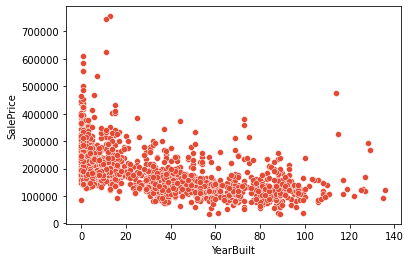

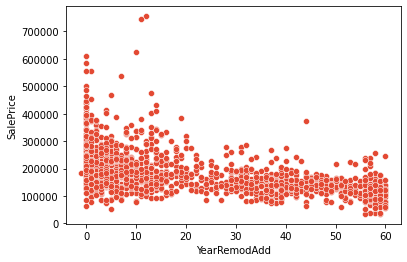

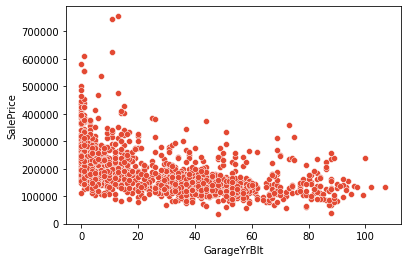

In [23]:
sns.set_palette('RdYlBu')
data=dataset.copy()
for feature in year_features:
    if feature != 'YrSold':
        data[feature]=data['YrSold']-data[feature]
        sns.scatterplot(x=feature,y='SalePrice',data=data)
        plt.show()

## Relationship between independent variables

<AxesSubplot:>

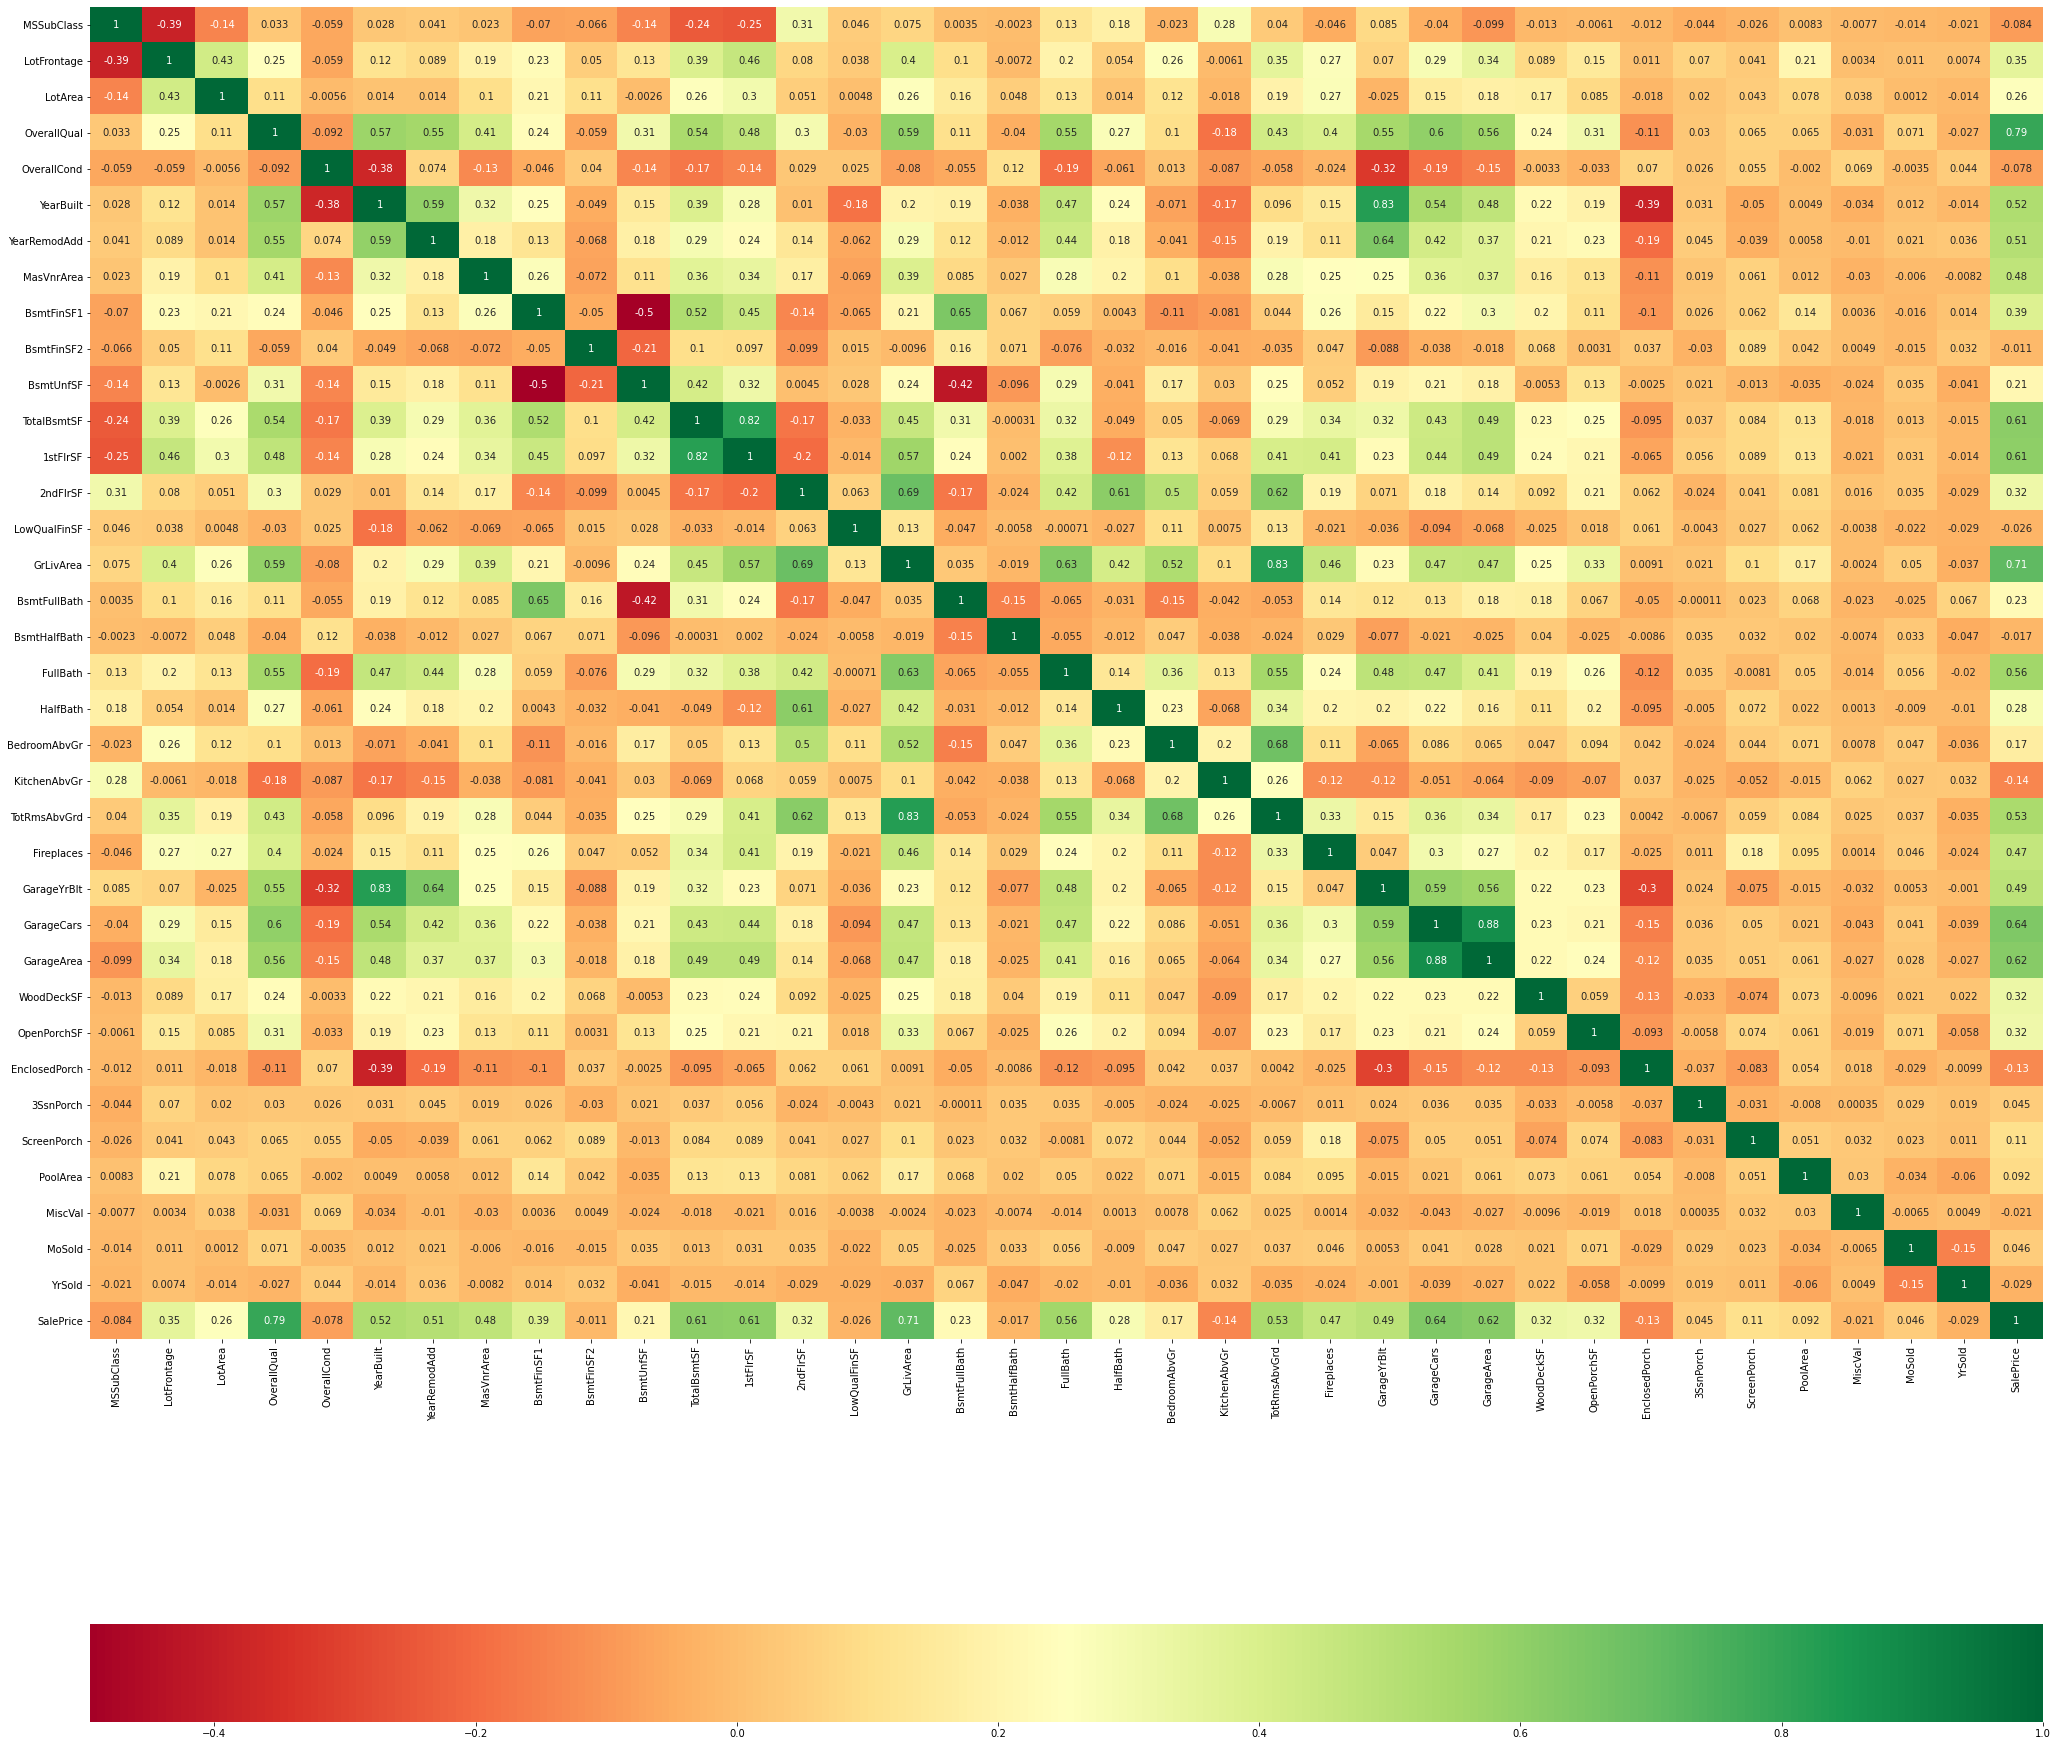

In [24]:
plt.figure(figsize=(35,35))
corr_mat=dataset.corr()
sns.heatmap(corr_mat,annot=True,cmap='RdYlGn',cbar_kws={"orientation": "horizontal"})

# Feature Engineering

In [25]:
X=dataset.copy()
X.drop('SalePrice',inplace=True,axis=1)
y=dataset['SalePrice']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Treating Missing Values

#### Categorical

In [27]:
pd.set_option('mode.chained_assignment', None)
def cat_missing_values(data,feature_list):
    for feature in feature_list:
        data[feature]=data[feature].fillna('Missing')
    return data

In [28]:
# Train data
missing_cat_features=[feature for feature in categorical_features if X_train[feature].isnull().sum()>0]
X_train=cat_missing_values(X_train,missing_cat_features)

In [29]:
# test data
missing_cat_features=[feature for feature in categorical_features if X_test[feature].isnull().sum()>0]
X_test=cat_missing_values(X_test,missing_cat_features)

#### Numerical

In [30]:
# Train Data
missing_num_features=[feature for feature in numerical_features if X_train[feature].isnull().sum()>0]
for feature in missing_num_features:
# adding weightage to the missing value which will indicate that the data was missing and it is handled
    X_train[feature+'_nan'] = np.where(X_train[feature].isnull(),1,0)
    X_train[feature]=X_train[feature].fillna(X_train[feature].median())

In [31]:
# test data
missing_num_features=[feature for feature in numerical_features if X_test[feature].isnull().sum()>0]
for feature in missing_num_features:
# adding weightage to the missing value which will indicate that the data was missing and it is handled
    X_test[feature+'_nan'] = np.where(X_test[feature].isnull(),1,0)
    X_test[feature]=X_test[feature].fillna(X_test[feature].median())

In [32]:
# Train Data
missing_year_features=[feature for feature in year_features if X_train[feature].isnull().sum()>0]
for feature in missing_year_features:
# adding weightage to the missing value which will indicate that the data was missing and it is handled
    X_train[feature+'_nan'] = np.where(X_train[feature].isnull(),1,0)
    X_train[feature]=X_train[feature].fillna(X_train[feature].median())

In [33]:
# test data
missing_year_features=[feature for feature in year_features if X_test[feature].isnull().sum()>0]
for feature in missing_year_features:
# adding weightage to the missing value which will indicate that the data was missing and it is handled
    X_test[feature+'_nan'] = np.where(X_test[feature].isnull(),1,0)
    X_test[feature]=X_test[feature].fillna(X_test[feature].median())

In [34]:
for feature in X_train.columns:
    if (X_train[feature].isnull().sum()>0):
        print('{} is not treated yet and has {} missing values'.format(feature,X_train[feature].isnull().sum()))

In [35]:
for feature in X_test.columns:
    if (X_test[feature].isnull().sum()>0):
        print('{} is not treated yet and has {} missing values'.format(feature,X_test[feature].isnull().sum()))

## Treating categorical features

In [36]:
#Training data
for feature in categorical_features:
    feature_propotion=X_train[feature].value_counts()/len(X_train)
    freq_cats=feature_propotion[feature_propotion>0.01].index
    feature_val=np.where(X_train[feature].isin(freq_cats),X_train[feature],'Rare_Cat')
    X_train[feature]=feature_val

In [37]:
#test data
for feature in categorical_features:
    feature_propotion=X_test[feature].value_counts()/len(X_test)
    freq_cats=feature_propotion[feature_propotion>0.01].index
    X_test[feature]=np.where(X_test[feature].isin(freq_cats),X_test[feature],'Rare_Cat')

In [38]:
#Train data
for feature in categorical_features:
    cat_labels=X_train[feature].value_counts().index
    cat_counts={cat:ind for ind,cat in enumerate(cat_labels)}
    X_train[feature]=X_train[feature].map(cat_counts)

In [39]:
for feature in categorical_features:
    cat_labels=X_test[feature].value_counts().index
    cat_counts={cat:ind for ind,cat in enumerate(cat_labels)}
    X_test[feature]=X_test[feature].map(cat_counts)

## Treating Year Features

In [40]:
# train data
for feature in year_features:
    if feature != 'YrSold':
        X_train[feature]=X_train['YrSold']-X_train[feature]

In [41]:
# test data
for feature in year_features:
    if feature != 'YrSold':
        X_test[feature]=X_test['YrSold']-X_test[feature]

## Applying transformation

In [42]:
# train data
for feature in continuous_features:
    if 0 in X_train[feature].unique():
        pass
    else:
        X_train[feature]=np.log(X_train[feature])

In [43]:
# test data
for feature in continuous_features:
    if 0 in X_test[feature].unique():
        pass
    else:
        X_test[feature]=np.log(X_test[feature])

## Scaling features

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler_train=MinMaxScaler()
X_train_scaled=scaler_train.fit_transform(X_train)

In [46]:
scaler_test=MinMaxScaler()
X_test_scaled=scaler_test.fit_transform(X_test)

## Feature Selection

In [47]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

In [48]:
select_from_model_ridge=SelectFromModel(Ridge(alpha=0.005,random_state=0))
select_from_model_ridge.fit(X_train_scaled,y_train)
selected_features_ridge=X_train.columns[(select_from_model_ridge.get_support())]

In [49]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_features_ridge)))
print('features with coefficients shrank to zero: {}'.format(np.sum(select_from_model_ridge.estimator_.coef_==0)))

total features: 82
selected features: 18
features with coefficients shrank to zero: 0


In [50]:
from sklearn.ensemble import ExtraTreesRegressor
extraTreesRegressor=ExtraTreesRegressor()

In [51]:
extraTreesRegressor.fit(X_train,y_train)

ExtraTreesRegressor()

In [52]:
feature_importances = pd.Series(extraTreesRegressor.feature_importances_,index=X_train.columns)

In [53]:
# select important features
important_features=[]
for feature in X_train.columns:
    if feature_importances[feature] > 0.005:
        important_features.append(feature)
        
len(important_features)

26

## Train Model

### Linear Models

In [54]:
X_train_ridge = X_train[selected_features_ridge]
from sklearn.preprocessing import MinMaxScaler
scaler_train=MinMaxScaler()
X_train_ridge_scaled=scaler_train.fit_transform(X_train_ridge)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [56]:
X_test_ridge = X_test[selected_features_ridge]
scaler_test=MinMaxScaler()
X_test_ridge_scaled=scaler_test.fit_transform(X_test_ridge)

##### Linear Regression

In [57]:
LM_model=LinearRegression()
LM_model.fit(X_train_ridge_scaled,y_train)
y_pred=LM_model.predict(X_test_ridge_scaled)

In [58]:
print('Mean squared error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Coefficient of determination: {}'.format(r2_score(y_test, y_pred)))

Mean squared error: 49720.20063746592
Coefficient of determination: 0.3757445902055041


##### Ridge Regression

In [59]:
def ridge_model(alpha):
    Ridge_model=Ridge(alpha=alpha)
    Ridge_model.fit(X_train_ridge_scaled,y_train)
    y_pred=Ridge_model.predict(X_test_ridge_scaled)
    print('Mean squared error for alpha = {} is {}'.format(alpha,mean_absolute_error(y_test, y_pred)))
    print('Coefficient of determination for alpha ={} is {}'.format(alpha,r2_score(y_test, y_pred)))

In [60]:
for alpha in [0.1,0.2,0.5,0.001,0.005]:
    ridge_model(alpha)

Mean squared error for alpha = 0.1 is 49866.902328820564
Coefficient of determination for alpha =0.1 is 0.36444734573642
Mean squared error for alpha = 0.2 is 50009.95992491417
Coefficient of determination for alpha =0.2 is 0.3611577628912912
Mean squared error for alpha = 0.5 is 50340.36996846851
Coefficient of determination for alpha =0.5 is 0.357146059553324
Mean squared error for alpha = 0.001 is 49721.32597824504
Coefficient of determination for alpha =0.001 is 0.37543731404214875
Mean squared error for alpha = 0.005 is 49726.167600355104
Coefficient of determination for alpha =0.005 is 0.37430792789218215


##### Polynomial Regression

In [61]:
#Transform the features
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train_ridge_scaled)
polynomial_features1= PolynomialFeatures(degree=2)
X_test_poly = polynomial_features1.fit_transform(X_test_ridge_scaled)

In [62]:
poly_model=LinearRegression()
poly_model.fit(X_train_poly,y_train)
y_pred=poly_model.predict(X_test_poly)

In [63]:
print('Mean squared error is {}'.format(mean_absolute_error(y_test, y_pred)))
print('Coefficient of determination is {}'.format(r2_score(y_test, y_pred)))

Mean squared error is 205786263632056.12
Coefficient of determination is -2.5931682486070965e+20


### Random Forest Regressor

In [64]:
X_train_important=X_train[important_features]
X_test_important=X_test[important_features]

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf_random=RandomForestRegressor()

In [66]:
import numpy as np

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [67]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [68]:
regressor=RandomizedSearchCV(rf_random,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42)

In [69]:
regressor.fit(X_train_important,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
regressor.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [71]:
regressor.best_score_

-857173455.8813792

In [72]:
final_model=RandomForestRegressor(n_estimators=1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth=25)

In [73]:
final_model.fit(X_train_important,y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [74]:
predictions=final_model.predict(X_test_important)

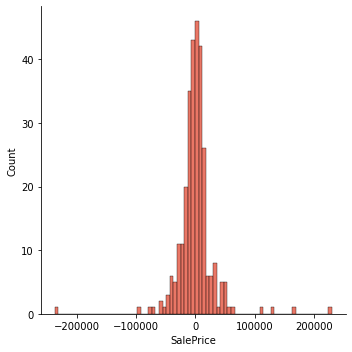

In [75]:
sns.displot(y_test-predictions)

In [76]:
print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:  17783.451453277885
MSE:  1014560187.7310055
RMSE:  31852.161429501226


In [77]:
important_features

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

### Save Model

In [78]:
import pickle
file=open('final_model.pkl','wb')
pickle.dump(final_model,file)